<a href="https://colab.research.google.com/github/jv-mendes07/recursos_humanos_ML/blob/main/recursos_humanos_(modelo_de_propens%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Propensão - Recursos Humanos
### Projeto de Machine Learning

In [133]:
# Importação de bibliotecas que serão usadas no projeto:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importação do dataset:

In [134]:
# Importação do conjunto de dados que será usado:

df = pd.read_csv('/content/drive/MyDrive/HR_comma.csv')

In [135]:
# Leitura breve das cinco primeiras linhas do conjunto de dados:

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Tratamento dos dados:

In [136]:
# Linhas e colunas do dataset atribuídas separadamente à duas variáveis:

l, c = df.shape

In [137]:
# Impressão da quantidade de linhas e de colunas contidas no dataframe:

print(f'Quantidade de Linhas: {l}')
print('\n')
print(f'Quantidade de Colunas: {c}')

Quantidade de Linhas: 14999


Quantidade de Colunas: 10


In [138]:
# Informações generalizadas do dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [139]:
# Conversão textual do nome das colunas, para que todas as colunas tenham uma formatação textual somente de letras minúsculas:

df.columns = df.columns.str.lower()

In [140]:
# Nome das colunas incluídas no dataset:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [141]:
# Quantidade de dados ausentes no dataset:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Análise exploratória dos dados (EDA):

#### (1) Qual é a quantidade de funcionários demitidos e retidos desta empresa?

In [142]:
# Porcentagem da quantidade de funcionários retidos e demitidos da empresa:

(df.left.value_counts(normalize = True) * 100).round(2)

0    76.19
1    23.81
Name: left, dtype: float64

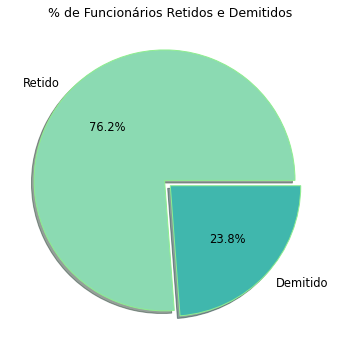

In [143]:
# Gráfico de pizza para visualizarmos proporcionalmente a quantidade de funcionários retidos e demitidos:

plt.figure(figsize = (16, 6))
plt.pie(x = df.left.value_counts(),
        labels = ['Retido', 'Demitido'],
        autopct = '%1.1f%%', explode = [0.06, 0],
        textprops = {'fontsize': 11.5,
                                      'color': 'k'},
        shadow = True, colors = sns.color_palette('mako_r'),
        wedgeprops = {'edgecolor' : 'lightgreen'})
plt.title('% de Funcionários Retidos e Demitidos', fontsize = 12.5, color = 'k')
plt.show()

#### (2) Qual é a porcentagem de funcionários por classificação salarial?

In [144]:
# % de funcionários por classificação salarial (baixo, médio ou alto salário):

(df.salary.value_counts(normalize = True) * 100).round(2)

low       48.78
medium    42.98
high       8.25
Name: salary, dtype: float64

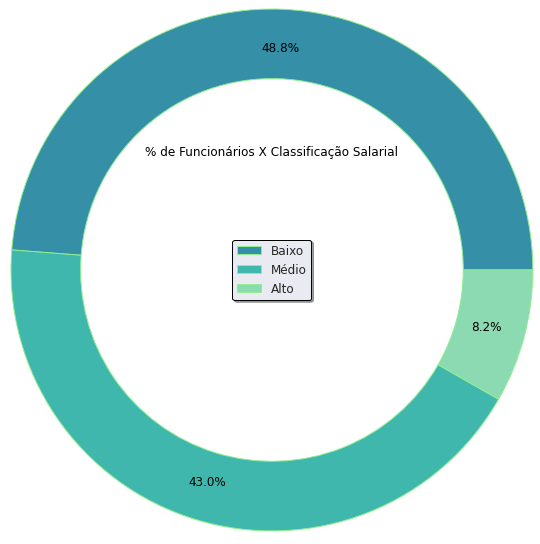

In [145]:
# Gráfico de rosca para vermos a proporção de funcionários por classificação salarial que trabalham nesta empresa:

plt.figure(figsize = (4, 4))
plt.pie(df.salary.value_counts(),
        labeldistance = 1, radius = 3, colors = sns.color_palette('mako')[3:],
        wedgeprops = dict(width = 0.8, edgecolor = 'lightgreen'), autopct = '%1.1f%%', textprops = {'fontsize': 12, 'color' : 'k'},
        pctdistance = 0.85)
plt.legend(labels = ['Baixo', 'Médio', 'Alto'], loc = 'center', prop = {'size': 12}, edgecolor = 'k', shadow = True)
plt.title('% de Funcionários X Classificação Salarial', loc = 'Center',
          fontdict = {'fontsize': 12}, color = 'k')
plt.show()

#### (3) Qual é a taxa de retenção e demissão dos funcionários por classificação salarial?

In [146]:
# Agrupamento da quantidade de funcionários demitidos e retidos por classificão salarial:

df_salary_retention = df.groupby(['salary', 'left']).agg({'left': 'size'})

In [147]:
# Renomeação da coluna:

df_salary_retention.rename(columns = {'left': 'qtd_left'}, inplace = True)

In [148]:
# Visualização da quantidade de demissões e retenções pela classificação salarial dos funcionários:

df_salary_retention

qtd_left
salary left          
high   0         1155
       1           82
low    0         5144
       1         2172
medium 0         5129
       1         1317

In [149]:
# Criação de coluna para representar a porcentagem de retenção / demissão por classificação salarial dos funcionários:

df_salary_retention = df_salary_retention.assign(perc_left = 
                           (df_salary_retention.qtd_left / 
                            df_salary_retention.qtd_left.sum() * 100)).round(2)

In [150]:
# Dataframe final com a quantidade e a porcentagem de retenção / demissão por classificação de salários dos funcionários da empresa:

df_salary_retention

qtd_left  perc_left
salary left                     
high   0         1155       7.70
       1           82       0.55
low    0         5144      34.30
       1         2172      14.48
medium 0         5129      34.20
       1         1317       8.78

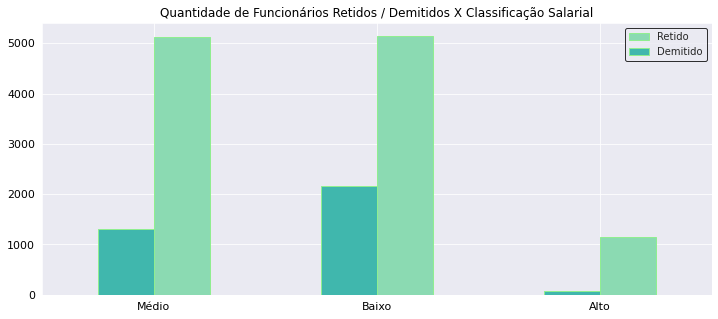

In [151]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões por classificação salarial:

sns.set_style('darkgrid')
ax = pd.crosstab(df['salary'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(['Alto', 'Baixo', 'Médio'],
                   fontsize = 11, color = 'k', 
                   rotation = 360)
ax.set_yticklabels(list(range(0, 5001, 1000)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.invert_xaxis()
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Classificação Salarial',
             fontsize = 12, color = 'k')
plt.show()

#### (4) Qual é a quantidade de retenções e demissões de funcionários por departamento?

In [152]:
# Agrupamento da quantidade de demissões / retenções por departamento: 

df.groupby(['department', 'left']).agg({'left': 'count'}).rename(columns = {
    'left': 'qtd_left'
}).sort_values(['left', 'qtd_left'],
               ascending = False)

,,qtd_left
department,left,
sales,1,1014
technical,1,697
support,1,555
IT,1,273
hr,1,215
accounting,1,204
marketing,1,203
product_mng,1,198
RandD,1,121


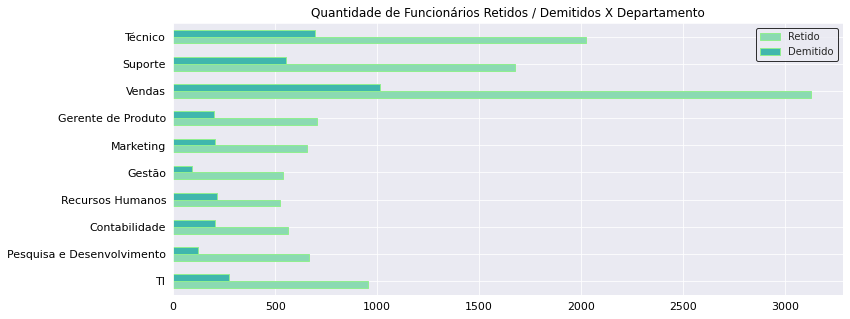

In [153]:
# Gráfico de barras horizontais para representar a quantidade de retenções e demissões por departamento:

sns.set_style('darkgrid')
ax = pd.crosstab(df['department'], df.left).plot(kind = 'barh',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_yticklabels(reversed(['Técnico',                    'Suporte', 
                    'Vendas',
                    'Gerente de Produto',
                    'Marketing',
                    'Gestão',
                    'Recursos Humanos',
                    'Contabilidade',
                   'Pesquisa e Desenvolvimento',
'TI']),
                   fontsize = 11, color = 'k'
                   )
ax.set_xticklabels(list(range(0, 3001, 500)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
#ax.invert_yaxis()
ax.set_ylabel('')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Departamento',
             fontsize = 12, color = 'k')
plt.show()

#### (5) Qual é a média e a mediana das demais variáveis por taxa de retenção dos funcionários?

In [154]:
# Média das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários: 

df.groupby('left').mean().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [155]:
# Mediana das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários: 

df.groupby('left').median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.0,198.0,3.0,0.0,0.0
1,0.41,0.79,4.0,224.0,4.0,0.0,0.0


#### (6) Qual é a taxa de funcionários retidos e demitidos que receberam promoções na empresa nos últimos 5 anos?

In [156]:
# Agrupamento de funcionários retidos e demitidos da empresa que receberam promoções nos últimos 5 anos:

df_promotion_left = df.groupby(['left', 'promotion_last_5years']).agg({'promotion_last_5years': 'count'}
                                                  ).rename(columns = {'promotion_last_5years': 'qtd_promotion_last_5years'})

In [157]:
# % de funcionários retidos e demitidos que receberam promoções nos últimos 5 anos:

df_promotion_left = df_promotion_left.assign(perc_promotion_last_5years = 
                         df_promotion_left.qtd_promotion_last_5years / df_promotion_left.qtd_promotion_last_5years.sum() * 100).round(2)

In [158]:
# Visualização do dataframe criado com a quantidade e o percentual de funcionários retidos e demitidos 
# que receberam promoções nos últimos 5 anos na empresa:

df_promotion_left

qtd_promotion_last_5years  \
left promotion_last_5years                              
0    0                                          11128   
     1                                            300   
1    0                                           3552   
     1                                             19   

                            perc_promotion_last_5years  
left promotion_last_5years                              
0    0                                           74.19  
     1                                            2.00  
1    0                                           23.68  
     1                                            0.13

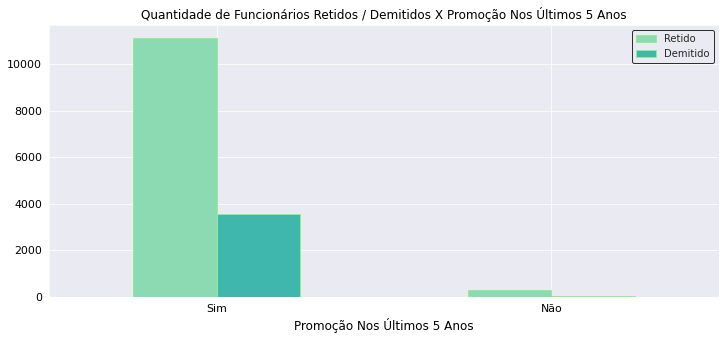

In [159]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões que receberam
# promoções nos últimos 5 anos na empresa:

sns.set_style('darkgrid')
ax = pd.crosstab(df['promotion_last_5years'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Promoção Nos Últimos 5 Anos', fontsize = 12, color = 'k')
ax.set_xticklabels(['Sim', 'Não'],
                   fontsize = 11, color = 'k', 
                   rotation = 360)
ax.set_yticklabels(list(range(0, 10001, 2000)), fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Promoção Nos Últimos 5 Anos',
            fontsize = 12, color = 'k')
plt.show()

## Preparação do modelo de Machine Learning

In [160]:
# Variáveis independentes ou preditoras que serão utilizadas para prevermos a propensão de um funcionário demitir-se:

sub_df = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company',
                'promotion_last_5years']]

In [161]:
# Transformação da coluna 'salary' em números para podermos utilizar o atributo de salário no modelo de regressão logística
# Modelos de machine learning aceitam somente variáveis numéricas para treinamento e teste preditivo:

sub_df = pd.concat([sub_df, pd.get_dummies(df.salary, prefix = 'salary')], axis = 'columns')

In [162]:
# Visualização das variáveis preditoras do dataframe: 

sub_df

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,1,0
14995,0.37,160,3,0,0,1,0
14996,0.37,143,3,0,0,1,0
14997,0.11,280,4,0,0,1,0


### Divisão do dataset em dados de treino e dados de teste:

In [163]:
# Importação da função que será usada para dividir o dataset em dados de treino e dados de teste do modelo:

from sklearn.model_selection import train_test_split

In [164]:
# Divisão do dataset em dados de treino e dados de teste
# 80 % dos dados serão usados para treino, e somente 20 % serão usados para testar a eficácia preditiva do modelo treinado:

X_train, X_test, y_train, y_test = train_test_split(sub_df, df.left, test_size = 0.2)

In [165]:
# Visualização breve dos dados de teste da variável X: 

X_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
6724,0.33,127,3,0,0,0,1
10430,0.71,132,5,0,0,0,1
2207,0.51,145,2,0,0,0,1
9573,0.93,191,4,0,0,0,1
9160,0.23,149,6,0,0,1,0
...,...,...,...,...,...,...,...
2110,0.93,143,3,0,0,1,0
12236,0.40,151,3,0,0,1,0
13002,0.80,194,3,0,0,0,1
11386,0.92,161,3,0,0,1,0


In [166]:
# Visualização breve dos dados de teste da variável Y: 

y_test

6724     0
10430    0
2207     0
9573     0
9160     0
        ..
2110     0
12236    1
13002    0
11386    0
12842    0
Name: left, Length: 3000, dtype: int64

In [167]:
# Importação do algoritmo de aprendizagem chamado regressão logística, que é usado principalmente para problemas de classificação:

from sklearn.linear_model import LogisticRegression

In [168]:
# Atribuição de tal algoritmo à variável 'model':

model = LogisticRegression()

In [169]:
# Método .fit aplicado para treinar o modelo de regressão logística com os dados de treino:

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [170]:
# Aplicação da função .predict para prevermos se os funcionários continuariam ou se demitiriam da empresa, dado os dados de teste da variável X:

model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
# Verificação da precisão e acurácia preditiva do modelo:

model.score(X_test, y_test).round(2)

0.77

In [172]:
# Previsão para saber se um funcionário hipotético continuaria na empresa ou não, dado os demais dados das demais variáveis:

model.predict([[0.80, 270, 4, 1, 1, 0, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [173]:
# Mais uma previsão para sabermos
# se um funcionário hipotético continuaria na empresa ou não, dado os demais dados das demais variáveis:

model.predict([[0.25, 200, 3, 0, 0, 1, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [174]:
# Reconstrução do modelo de machine learning para saber se a variável 'department' melhoraria a eficácia preditiva do modelo:

sub_df_2 = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company',
                'promotion_last_5years']]

In [175]:
# Repetição do mesmo processo com a variável 'salary', transformação de tal variável categórica em dados numéricos
# para usarmos no modelo de machine learning:

sub_df_2 = pd.concat([sub_df_2, pd.get_dummies(df.salary, prefix = 'salary')], axis = 'columns')

In [176]:
# Transformação da variável categórica nominal 'department' em dados numéricas
# para aplicarmos o modelo:

sub_df_2 = pd.concat([sub_df_2, pd.get_dummies(df.department, prefix = 'department')], axis = 'columns')

In [177]:
# Visualização do dataframe final:

sub_df_2

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,157,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,160,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,143,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,280,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [178]:
# Divisão 80 / 20 de dados de treino e dados de teste:

X_train, X_test, y_train, y_test = train_test_split(sub_df_2, df.left, test_size = 0.2)

In [179]:
# Visualização dos dados de teste da variável X:

X_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
5793,0.80,271,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5096,0.73,148,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0
11738,0.52,222,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5774,0.95,246,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9249,0.98,186,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,0.64,258,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4524,0.78,180,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10747,0.93,192,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6331,0.75,173,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [180]:
# Visualização dos dados de teste da variável Y:

y_test

5793     0
5096     0
11738    0
5774     0
9249     0
        ..
13562    0
4524     0
10747    0
6331     0
5457     0
Name: left, Length: 3000, dtype: int64

In [181]:
# .fit para treinarmos o modelo com os dados de treino:

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [182]:
# Predição da retenção dos funcionários, dado os valores das variáveis preditoras:

model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
# Verificação da eficácia preditiva do novo modelo treinado:

model.score(X_test, y_test).round(2)

0.76

In [184]:
# Previsão para saber se um funcionário hipotético continuaria na empresa ou não, dado os demais dados das demais variáveis:

model.predict([[0.80, 270, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [185]:
# Mais uma previsão para sabermos
# se um funcionário hipotético continuaria na empresa ou não, dado os demais dados das demais variáveis:

model.predict([[0.30, 200, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

## FIM